<a href="https://colab.research.google.com/github/manaswinibeereddy/MAX-Object-Detector-Web-App/blob/master/Netflix_Data_Cleaning%2C_Analysis_and_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

import kagglehub
ariyoomotade_netflix_data_cleaning_analysis_and_visualization_path = kagglehub.dataset_download('ariyoomotade/netflix-data-cleaning-analysis-and-visualization')

print('Data source import complete.')


Using Colab cache for faster access to the 'netflix-data-cleaning-analysis-and-visualization' dataset.
Data source import complete.


### ***1. Importing Libraries***

In [13]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud


# remove warnings

import warnings

warnings.filterwarnings('ignore')


### ***2. Load the Dataset***

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ariyoomotade/netflix-data-cleaning-analysis-and-visualization")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'netflix-data-cleaning-analysis-and-visualization' dataset.
Path to dataset files: /kaggle/input/netflix-data-cleaning-analysis-and-visualization


In [16]:
data = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')


In [18]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
# Describe the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [17]:
# Checking the shape of the data

num_rows, num_cols = data.shape



print("Shape of the Data:")

print(f"Number of Rows: {num_rows}")

print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 8790
Number of Columns: 10



### ***3. Data Cleaning***



*Identify and handle missing data, correct data types, and drop duplicates.*

In [19]:
# Check for missing values

print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [20]:
# Checking duplicates if any

data.duplicated().any()

np.False_

In [21]:
# Convert 'date_added' to datetime

data['date_added'] = pd.to_datetime(data['date_added'])

In [22]:
# Show data types to confirm changes

data.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


### ***4. Exploratory Data Analysis (EDA)***

#### ***4.1 Content Type Distribution (Movies vs. TV Shows)***

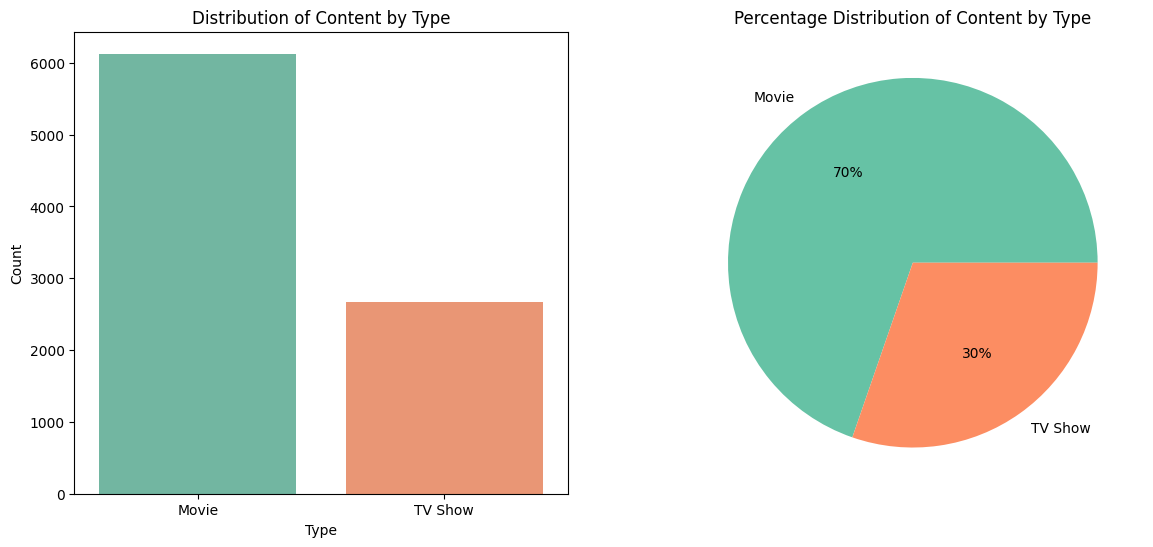

In [23]:
# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()

# Plot the distribution

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')

plt.title('Distribution of Content by Type')

plt.xlabel('Type')

plt.ylabel('Count')



plt.subplot(1, 2, 2)

plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))

plt.title('Percentage Distribution of Content by Type')

plt.show()

#### ***4.2 Rating Frequency (Movies vs. TV Shows)***

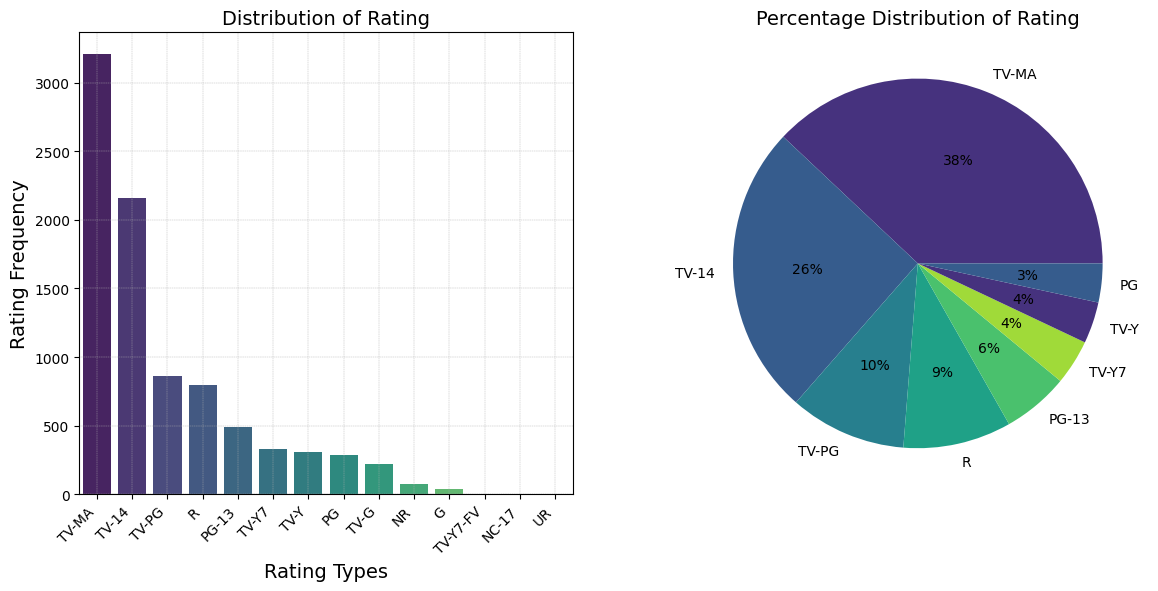

In [24]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x='rating', y='count', data=ratings, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Rating Types", fontsize=14)

plt.ylabel("Rating Frequency", fontsize=14)

plt.title('Distribution of Rating', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.3)



plt.subplot(1, 2, 2)

plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('viridis'))

plt.title('Percentage Distribution of Rating', fontsize=14)

plt.show()

#### ***4.3 Top 10 Countries with Most Content***

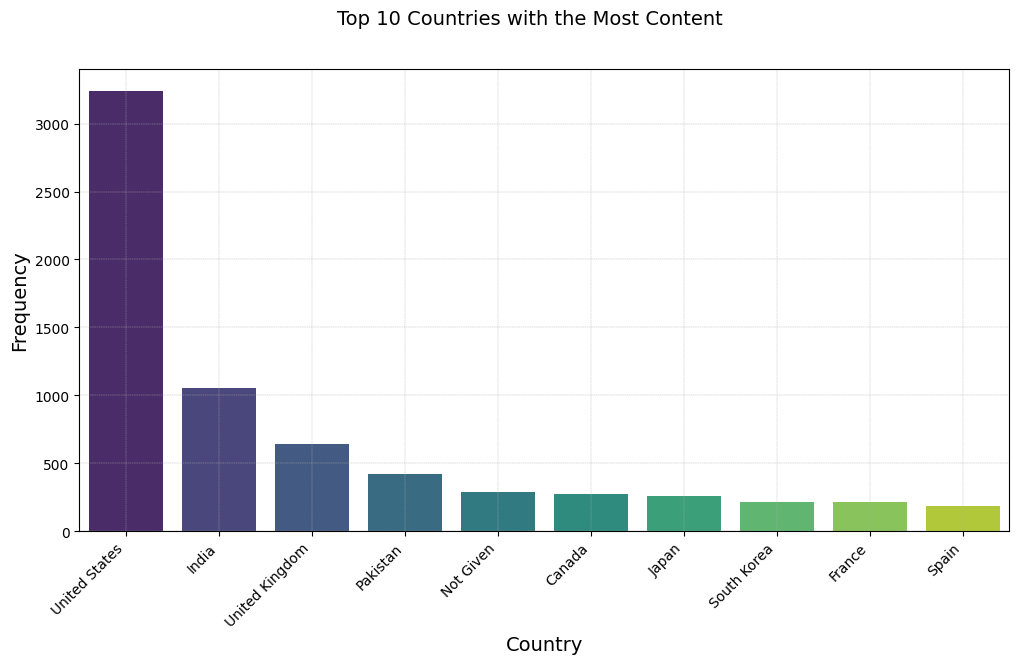

In [25]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(12, 6))

sns.barplot(x='country', y='count', data=top_ten_countries, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Country", fontsize=14)

plt.ylabel("Frequency", fontsize=14)

plt.suptitle("Top 10 Countries with the Most Content", fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

#### ***4.4 Top 15 Directors with the Most Titles***

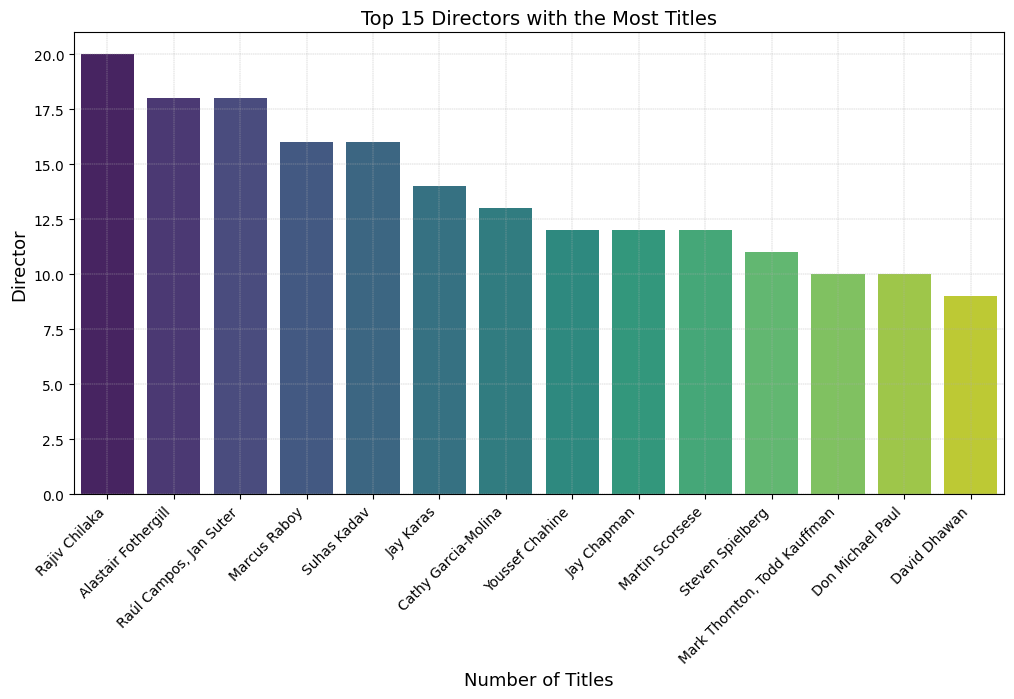

In [26]:
# Count titles by director

top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

# Plot top directors

plt.figure(figsize=(12, 6))

sns.barplot(y='count', x='director', data=top_directors, palette='viridis')

plt.title('Top 15 Directors with the Most Titles', fontsize=14)

plt.xlabel('Number of Titles', fontsize=13)

plt.ylabel('Director', fontsize=13)

plt.xticks(rotation=45, ha='right')

plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

#### ***4.5 Top 10 Popular Movie Genres***

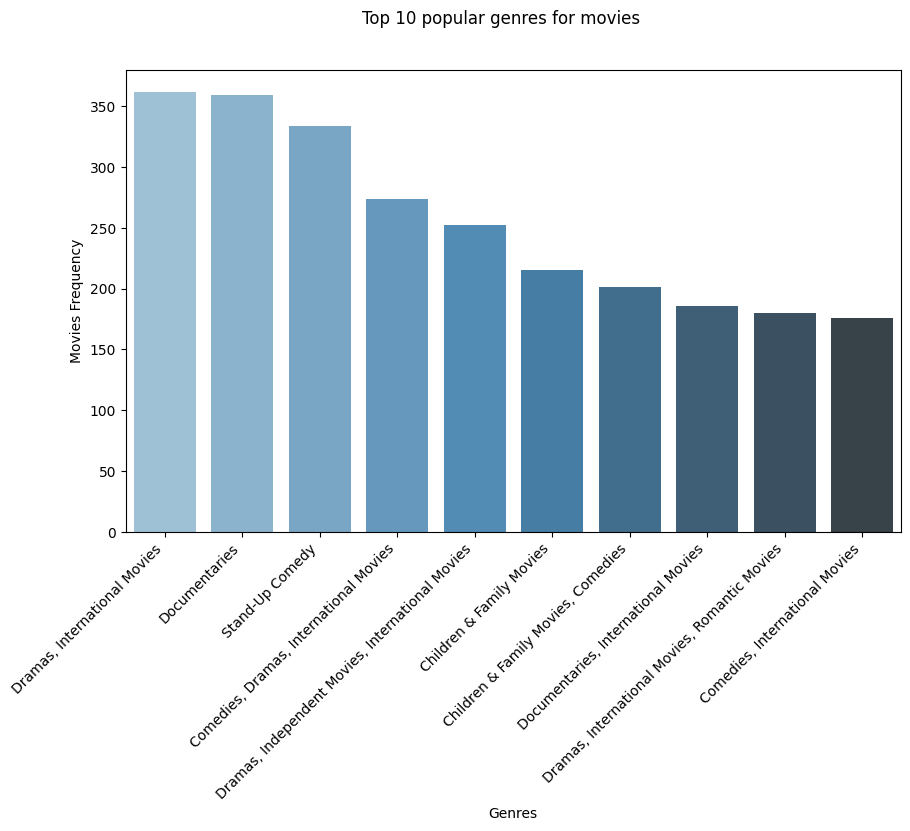

In [27]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]



plt.figure(figsize=(10, 6))

sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Genres")

plt.ylabel("Movies Frequency")

plt.suptitle("Top 10 popular genres for movies")

plt.show()

#### ***4.6 Top 10 TV Shows Genres***

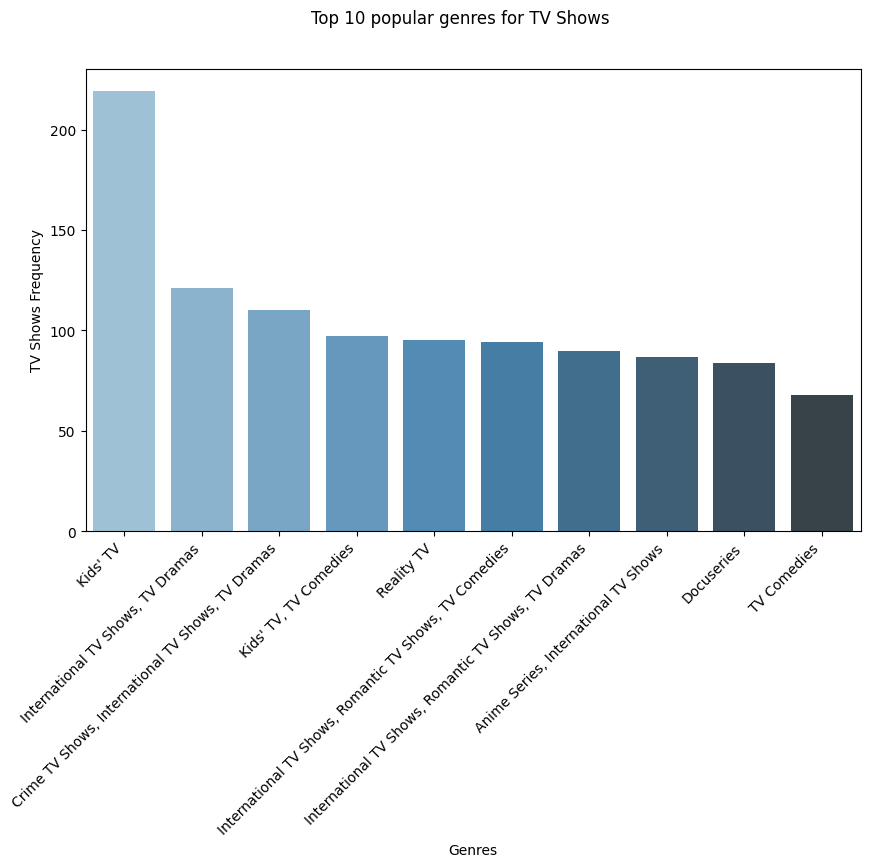

In [28]:
plt.figure(figsize=(10, 6))

sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='Blues_d')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Genres")

plt.ylabel("TV Shows Frequency")

plt.suptitle("Top 10 popular genres for TV Shows")

plt.show()

In [29]:
# Extract year and month from 'date_added'

data['year_added'] = data['date_added'].dt.year

data['month_added'] = data['date_added'].dt.month

#### ***4.7 Monthly Releases of Movies and TV shows***

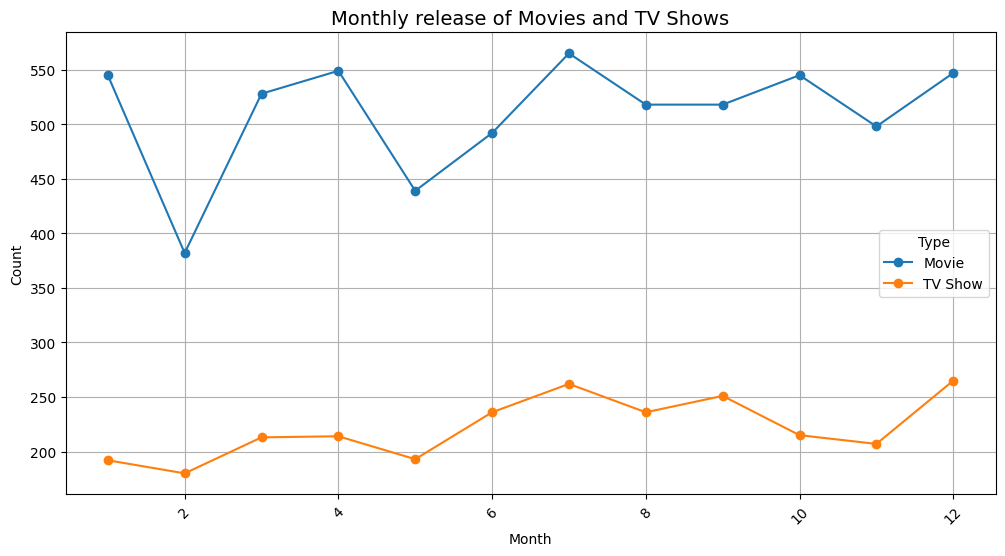

In [30]:
# Plot content added over the months using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Monthly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Month')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()

#### ***4.8 Yearly Releases of Movies and TV shows***

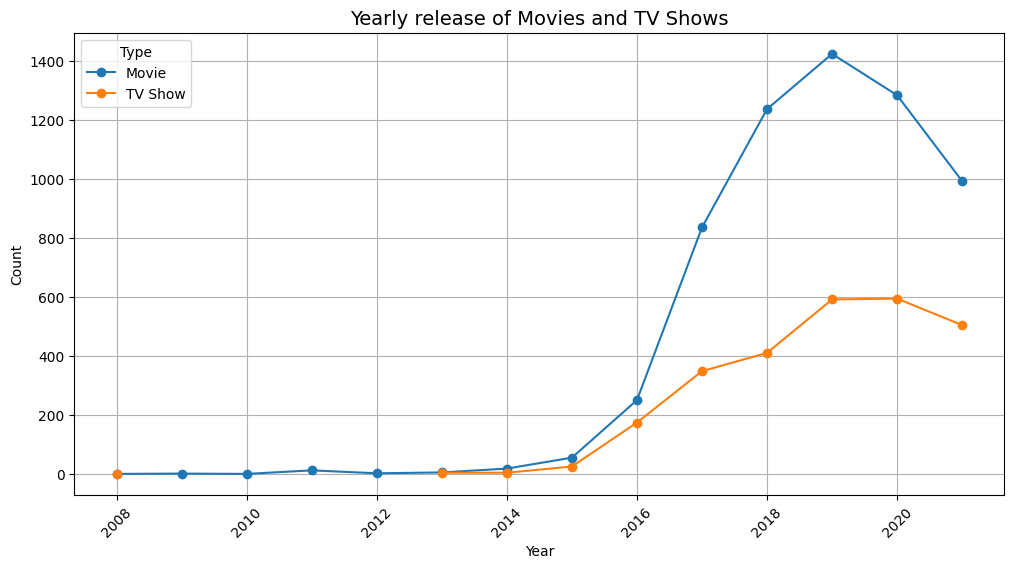

In [31]:
# Plot content added over the years using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Yearly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Year')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()

#### ***4.9 Word Cloud of Movie Titles***

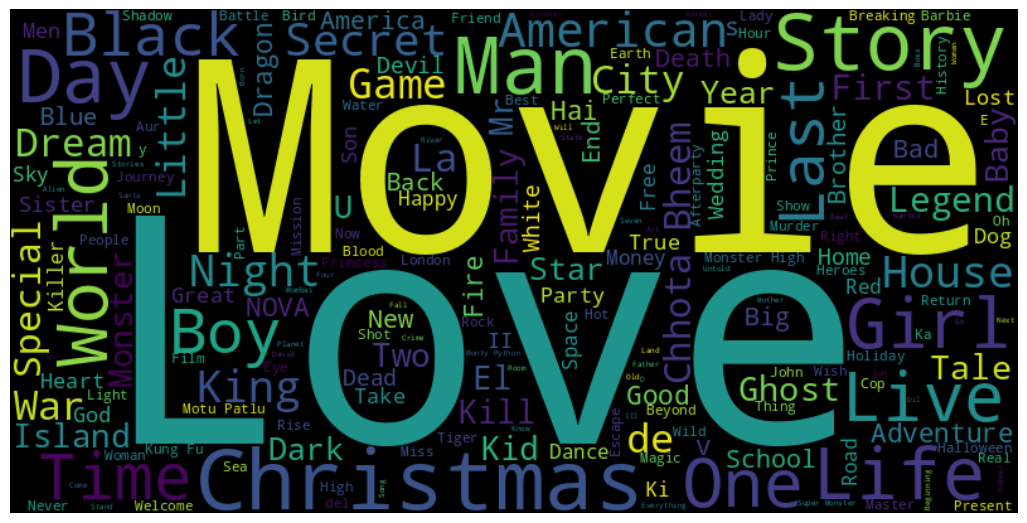

In [32]:
# Create a word cloud for movie titles

movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))



# Display the word cloud

plt.figure(figsize=(13, 7))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()